### Recognition system of Brazilian flora species

In [38]:
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import skimage.transform
import skimage.color
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import glob
import code
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import datetime
from PIL import Image
from itertools import chain
import csv
import random
import pickle

import warnings
warnings.filterwarnings('ignore');
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def load_training_data():
    paths = [
        "images/1-Acrocarpus fraxinifolius/*",
        "images/2-Araucaria angustifolia/*",
        "images/3-Aspidosperma polyneuron/*",
        "images/4-Aspidosperma sp/*",
        "images/5-Bagassa guianensis/*",
        "images/6-Balfourodendron riedelianum/*",
        "images/7-Bertholletia excelsa/*",
        "images/8-Bowdichia sp/*",
        "images/9-Brosimum parinarioides/*",
        "images/10-Carapa guianensis/*",
        "images/11-Cariniana estrellensis/*",
        "images/12-Cedrela fissilis/*",
        "images/13-Cedrelinga cateniformis/*",
        "images/14-Cordia goeldiana/*",
        "images/15-Couratari sp/*",
        "images/16-Dipteryx sp/*",
        "images/17-Erisma uncinatum/*",
        "images/18-Eucalyptus sp/*",
        "images/19-Eugenia pyriformis/*",
        "images/20-Euxylophora paraensis/*",
        "images/21-Goupia glabra/*",
        "images/22-Grevillea robusta/*",
        "images/23-Handroanthus sp/*",
        "images/24-Hymenaea sp/*",
        "images/25-Hymenolobium petraeum/*",
        "images/26-Hymenolobium sp/*",
        "images/27-Inga vera/*",
        "images/28-Laurus nobilis/*",
        "images/29-Machaerium paraguariense/*",
        "images/30-Machaerium sp/*",
        "images/31-Manilkara elata/*",
        "images/32-Melia azedarach/*",
        "images/33-Mezilaurus itauba/*",
        "images/34-Micropholis venulosa/*",
        "images/35-Mimosa scabrella/*",
        "images/36-Muellera campestris/*",
        "images/37-Myroxylon balsamum/*",
        "images/38-Nectandra megapotamica/*",
        "images/39-Ocotea indecora/*",
        "images/40-Ocotea porosa/*",
        "images/41-Peltogyne sp/*",
        "images/42-Pinus sp/*",
        "images/43-Pouteria pachycarpa/*",
        "images/44-Simarouba amara/*",
        "images/45-Swietenia macrophylla/*",
        "images/46-Vochysia sp/*",           
                
    ]
    labels = []
    image_paths = []
    for path in paths:
        for im_path in glob.glob(path):
            if path == "images/1-Acrocarpus fraxinifolius/*":
                labels.append("Acrocarpus-fraxinifolius")
            if path == "images/2-Araucaria angustifolia/*":
                labels.append("Araucaria angustifolia")       
            if path == "images/3-Aspidosperma polyneuron/*":
                labels.append("Aspidosperma polyneuron")
            if path == "images/4-Aspidosperma sp/*":
                labels.append("Aspidosperma sp")
            if path == "images/5-Bagassa guianensis/*":
                labels.append("Bagassa guianensis")
            if path == "images/6-Balfourodendron riedelianum/*":
                labels.append("Balfourodendron riedelianum")
            if path == "images/7-Bertholletia excelsa/*":
                labels.append("Bertholletia excelsa")    
            if path == "images/8-Bowdichia sp/*":
                labels.append("Bowdichia sp")
            if path == "images/9-Brosimum parinarioides/*":
                labels.append("Brosimum parinarioides")
            if path == "images/10-Carapa guianensis/*":
                labels.append("Carapa guianensis")  
            if path == "images/11-Cariniana estrellensis/*":
                labels.append("Cariniana estrellensis")
            if path == "images/12-Cedrela fissilis/*":
                labels.append("Cedrela fissilis")
            if path == "images/13-Cedrelinga cateniformis/*":
                labels.append("Cedrelinga cateniformis")
            if path == "images/14-Cordia goeldiana/*":
                labels.append("Cordia goeldiana")
            if path == "images/15-Couratari sp/*":
                labels.append("Couratari sp")
            if path == "images/16-Dipteryx sp/*":
                labels.append("Dipteryx sp")
            if path == "images/17-Erisma uncinatum/*":
                labels.append("Erisma uncinatum")
            if path == "images/18-Eucalyptus sp/*":
                labels.append("Eucalyptus sp")
            if path == "images/19-Eugenia pyriformis/*":
                labels.append("Eugenia pyriformis")
            if path == "images/20-Euxylophora paraensis/*":
                labels.append("Euxylophora paraensis")     
            if path == "images/21-Goupia glabra/*":
                labels.append("Goupia glabra")
            if path == "images/22-Grevillea robusta/*":
                labels.append("Grevillea robusta")
            if path == "images/23-Handroanthus sp/*":
                labels.append("Handroanthus sp")
            if path == "images/24-Hymenaea sp/*":
                labels.append("Hymenaea sp")
            if path == "images/25-Hymenolobium petraeum/*":
                labels.append("Hymenolobium petraeum")
            if path == "images/26-Hymenolobium sp/*":
                labels.append("Hymenolobium sp")
            if path == "images/27-Inga vera/*":
                labels.append("Inga vera")
            if path == "images/28-Laurus nobilis/*":
                labels.append("Laurus nobilis")
            if path == "images/29-Machaerium paraguariense/*":
                labels.append("Machaerium paraguariense")
            if path == "images/30-Machaerium sp/*":
                labels.append("Machaerium sp")       
            if path == "images/31-Manilkara elata/*":
                labels.append("Manilkara elata")
            if path == "images/32-Melia azedarach/*":
                labels.append("Melia azedarach")
            if path == "images/33-Mezilaurus itauba/*":
                labels.append("Mezilaurus itauba")
            if path == "images/34-Micropholis venulosa/*":
                labels.append("Micropholis venulosa")
            if path == "images/35-Mimosa scabrella/*":
                labels.append("Mimosa scabrella")
            if path == "images/36-Muellera campestris/*":
                labels.append("Muellera campestris")
            if path == "images/37-Myroxylon balsamum/*":
                labels.append("Myroxylon balsamum")
            if path == "images/38-Nectandra megapotamica/*":
                labels.append("Nectandra megapotamica")
            if path == "images/39-Ocotea indecora/*":
                labels.append("Ocotea indecora")
            if path == "images/40-Ocotea porosa/*":
                labels.append("Ocotea porosa")        
            if path == "images/41-Peltogyne sp/*":
                labels.append("Peltogyne sp")
            if path == "images/42-Pinus sp/*":
                labels.append("Pinus sp")
            if path == "images/43-Pouteria pachycarpa/*":
                labels.append("Pouteria pachycarpa")
            if path == "images/44-Simarouba amara/*":
                labels.append("Simarouba amara")
            if path == "images/45-Swietenia macrophylla/*":
                labels.append("Swietenia macrophylla")
            if path ==  "images/46-Vochysia sp/*":
                labels.append("Vochysia sp")
            image_paths.append(im_path)
    return image_paths, labels

train_paths, train_labels = load_training_data()

In [3]:
def get_image_features(image_paths, shape):
    height, width, channels = shape
    array = np.zeros((len(image_paths), height, width, channels))
    for i, path in enumerate(image_paths):
        im = Image.open(path)
        as_array = np.asarray(im)
        if len(as_array.shape) == 2: # convert to 3 channels (required input to VGG)
            as_array = skimage.color.gray2rgb(as_array)
        resized = skimage.transform.resize(as_array, shape)
        array[i,:,:] = resized
        if (i + 1) % 300 == 0:
            print(f'Finished loading {i+1} samples')
    return array

In [40]:
categorical_mapping = { label: i for i, label in enumerate(set(train_labels)) }
#categorical_mapping

In [5]:
def labels_to_np_array(labels, mapping):
    return np.array([mapping[label] for label in labels])

In [6]:
IMAGE_SHAPE = (150, 150, 3)

In [7]:
full_training_X = get_image_features(train_paths, IMAGE_SHAPE)
full_training_y = labels_to_np_array(train_labels, categorical_mapping)

Finished loading 300 samples
Finished loading 600 samples
Finished loading 900 samples
Finished loading 1200 samples
Finished loading 1500 samples
Finished loading 1800 samples


In [10]:
from sklearn.model_selection import train_test_split
SEED = 52
TEST_SET_SIZE = .3

X_train, X_test, y_train, y_test = train_test_split(
    full_training_X, full_training_y, test_size=TEST_SET_SIZE, random_state=SEED, shuffle =True)

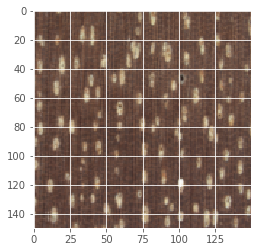

In [28]:
X_train.shape
# sanity check, what does one image look like?
_ = plt.imshow(X_train[4])

In [29]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))

In [30]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [33]:
EPOCHS, BATCH_SIZE = 10, 32

In [34]:
from sklearn.metrics import classification_report
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

Train on 1064 samples, validate on 266 samples
Epoch 1/10
1064/1064 [==============================] - 45s - loss: 3.7758 - acc: 0.0461 - val_loss: 3.7310 - val_acc: 0.1053
Epoch 2/10
1064/1064 [==============================] - 56s - loss: 3.5337 - acc: 0.0940 - val_loss: 3.4013 - val_acc: 0.0414
Epoch 3/10
1064/1064 [==============================] - 57s - loss: 3.1458 - acc: 0.0949 - val_loss: 3.1040 - val_acc: 0.0977
Epoch 4/10
1064/1064 [==============================] - 59s - loss: 2.9186 - acc: 0.1259 - val_loss: 2.8636 - val_acc: 0.0865
Epoch 5/10
1064/1064 [==============================] - 60s - loss: 2.7267 - acc: 0.1222 - val_loss: 2.7882 - val_acc: 0.0677
Epoch 6/10
1064/1064 [==============================] - 60s - loss: 2.5289 - acc: 0.1776 - val_loss: 2.5817 - val_acc: 0.2293
Epoch 7/10
1064/1064 [==============================] - 56s - loss: 2.3303 - acc: 0.2397 - val_loss: 2.5154 - val_acc: 0.1917
Epoch 8/10
1064/1064 [==============================] - 56s - loss: 2.1

In [35]:
from sklearn.metrics import classification_report

y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

571/571 [==============================] - 10s    
              precision    recall  f1-score   support

           0       0.14      0.70      0.24        10
           1       0.16      1.00      0.28        10
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        21
           6       0.72      0.72      0.72        18
           7       1.00      0.25      0.40         4
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         7
          12       1.00      0.11      0.20         9
          13       0.82      0.60      0.69        15
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00        16
          16       0.00      0

EPOCHS =50

In [36]:
from sklearn.metrics import classification_report
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=BATCH_SIZE, validation_split=0.2)
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

Train on 1064 samples, validate on 266 samples
Epoch 1/50
1064/1064 [==============================] - 58s - loss: 1.9739 - acc: 0.3365 - val_loss: 2.1737 - val_acc: 0.3158
Epoch 2/50
1064/1064 [==============================] - 56s - loss: 1.7948 - acc: 0.4070 - val_loss: 2.0834 - val_acc: 0.2932
Epoch 3/50
1064/1064 [==============================] - 56s - loss: 1.6740 - acc: 0.4436 - val_loss: 2.0218 - val_acc: 0.3083
Epoch 4/50
1064/1064 [==============================] - 56s - loss: 1.5715 - acc: 0.4878 - val_loss: 2.3270 - val_acc: 0.2444
Epoch 5/50
1064/1064 [==============================] - 56s - loss: 1.5383 - acc: 0.4840 - val_loss: 2.0083 - val_acc: 0.3759
Epoch 6/50
1064/1064 [==============================] - 56s - loss: 1.4897 - acc: 0.4934 - val_loss: 2.3310 - val_acc: 0.2406
Epoch 7/50
1064/1064 [==============================] - 56s - loss: 1.4433 - acc: 0.5301 - val_loss: 2.0953 - val_acc: 0.3008
Epoch 8/50
1064/1064 [==============================] - 56s - loss: 1.4

In [37]:
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

571/571 [==============================] - 10s    
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       1.00      0.40      0.57        10
           2       1.00      1.00      1.00        26
           3       0.00      0.00      0.00         6
           4       1.00      0.08      0.14        13
           5       0.61      0.95      0.74        21
           6       0.95      1.00      0.97        18
           7       0.43      0.75      0.55         4
           8       0.00      0.00      0.00         9
           9       0.50      0.33      0.40         9
          10       1.00      0.67      0.80        12
          11       0.19      1.00      0.32         7
          12       1.00      0.78      0.88         9
          13       0.94      1.00      0.97        15
          14       1.00      0.73      0.84        11
          15       1.00      0.19      0.32        16
          16       0.71      0